# Impact Of Online And Offline Education On Student Performance And Engagement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# prompt: https://docs.google.com/spreadsheets/d/1OBkEKOuCJlMVfqWYKlZg2qEuLjMc5lfU0MlpqJ5_MnI/edit?resourcekey=&gid=989434159#gid=989434159
# show first five row of data

import pandas as pd

sheet_id = "1OBkEKOuCJlMVfqWYKlZg2qEuLjMc5lfU0MlpqJ5_MnI"
sheet_name = "Form_Responses1" # Replace with your actual sheet name if different
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)
print(df.head())

             Timestamp 1. What is your current level of education?   \
0  10/20/2024 22:41:42                                     Graduate   
1  10/20/2024 22:44:07                                     Graduate   
2   10/22/2024 9:37:38                                Undergraduate   
3   10/22/2024 9:39:18                                Undergraduate   
4   10/22/2024 9:40:00                                     Graduate   

  2. What is your gender?  3. What is your primary field of study?   \
0                     Male                 Information & Technology   
1                     Male                          Data analytics    
2                     Male                          Data Analytics    
3                   Female              Data Analytics for Business   
4                     Male             Data analytics for business    

  4. Are you a domestic or foreign (international) student?   \
0                    Foreign (International) student           
1                 

# Data Cleaning

**Renames Columns in the DataFrame**

In [3]:
df.rename(columns={
    'Timestamp': 'Timestamp',
    '1. What is your current level of education? ': 'Education_Level',
    '2. What is your gender? ': 'Gender',
    '3. What is your primary field of study? ': 'Field_of_Study',
    '4. Are you a domestic or foreign (international) student? ': 'Domestic_or_International',
    '5.  Are you currently working full-time or part-time while studying?': 'Work_Status',
    '6. Which mode of education do you prefer?': 'Education_Mode',
    '7. Have you taken any online courses in the past year?': 'Online_Courses_Last_Year',
    '8(a) . What factors influence your choice of online  education?  (select all that apply)': 'Online_Influence_Factors',
    '8(b).  What factors influence your choice of offline education?  (select all that apply)': 'Offline_Influence_Factors',
    '9. How do you rate the effectiveness of online education on a scale of 1 to 5 (1 being ineffective, 5 being very effective)?': 'Online_Effectiveness',
    '10. What challenges do you face in online education?  (select all that apply)': 'Online_Challenges',
    '11. How often do you engage with your instructors during online courses?': 'Online_Student_Engagement',
    '12. How satisfied are you with the quality of learning materials provided in online courses?': 'Online_Material_Satisfaction',
    '13. Do you feel that online education provides enough opportunities for collaboration and interaction with other students?': 'Online_Collaboration',
    '14. What benefits do you find in offline education compared to online education?  (select all that apply)': 'Offline_Benefits',
    '15. How satisfied are you with the availability of learning resources (labs, libraries) in offline education? ': 'Offline_Resources_Satisfaction',
    '16. How would you rate the classroom environment in terms of engagement and participation? ': 'Offline_Classroom_Engagement',
    '17. Do you feel more motivated to study in an offline (in-person) setting compared to an online one? ': 'Offline_Motivation',
    ' 18.  Which mode of education has helped you achieve better grades or academic results?  ': 'Better_Grades_Mode',
    '19. In your opinion, which mode of education, online or offline, better prepares you for getting a job?"  ': 'Job_Preparation_Mode'
}, inplace=True)

# Display the updated column names to confirm renaming
print("Renamed Columns:")
print(df.columns.tolist())

Renamed Columns:
['Timestamp', 'Education_Level', 'Gender', 'Field_of_Study', 'Domestic_or_International', 'Work_Status', 'Education_Mode', 'Online_Courses_Last_Year', 'Online_Influence_Factors', 'Offline_Influence_Factors', 'Online_Effectiveness', 'Online_Challenges', 'Online_Student_Engagement', 'Online_Material_Satisfaction', 'Online_Collaboration', 'Offline_Benefits', 'Offline_Resources_Satisfaction', 'Offline_Classroom_Engagement', 'Offline_Motivation', 'Better_Grades_Mode', 'Job_Preparation_Mode']


In [4]:
df.columns

Index(['Timestamp', 'Education_Level', 'Gender', 'Field_of_Study',
       'Domestic_or_International', 'Work_Status', 'Education_Mode',
       'Online_Courses_Last_Year', 'Online_Influence_Factors',
       'Offline_Influence_Factors', 'Online_Effectiveness',
       'Online_Challenges', 'Online_Student_Engagement',
       'Online_Material_Satisfaction', 'Online_Collaboration',
       'Offline_Benefits', 'Offline_Resources_Satisfaction',
       'Offline_Classroom_Engagement', 'Offline_Motivation',
       'Better_Grades_Mode', 'Job_Preparation_Mode'],
      dtype='object')

In [5]:
df['Field_of_Study'].unique()

array(['Information & Technology', 'Data analytics ', 'Data Analytics ',
       'Data Analytics for Business', 'Data analytics for business ',
       'Data', 'Business', 'Computer programming ',
       'Computer Programming', 'Engineering ', 'Computing and IT',
       'Mobile Applications Development ', 'Economics ',
       'Computer Programming ', 'IT', 'Data analytics', 'cyber security ',
       'Business ', 'Cybersecurity',
       'Computer system Technician Networking',
       'Computer Science Engineering ', 'computer programming ',
       'Data Analytics for Business ', 'Business and IT (hybrid degree)',
       'degree program', 'Business Adminstration',
       'Computer Systems Networking Technology ', 'Computer science ',
       'Business Management Engineer', 'Computer science',
       'Computer Science ', 'Information Technology ',
       'Finance and Account', 'Accounting ',
       'Data-analytics for business ', 'Data analytics for business',
       'Data Analytics', 'Liter

**Mapping**

In [6]:
# Define the mapping dictionary
mapping_dict = {
    'data analytics': 'Information & Technology',
    'data analytics for business': 'Information & Technology',
    'data': 'Information & Technology',
    'computing and it': 'Information & Technology',
    'computer programming': 'Information & Technology',
    'mobile applications development': 'Information & Technology',
    'it': 'Information & Technology',
    'data analatics':'Information & Technology',
    'cyber security': 'Information & Technology',
    'cybersecurity': 'Information & Technology',
    'computer system technician networking': 'Information & Technology',
    'computer science engineering': 'Information & Technology',
    'computer science': 'Information & Technology',
    'computer systems networking technology': 'Information & Technology',
    'information technology': 'Information & Technology',
    'data science': 'Information & Technology',
    'data-analytics for business': 'Information & Technology'
}

# Standardize column values: strip spaces and convert to lowercase
df['Field_of_Study'] = df['Field_of_Study'].str.strip().str.lower()

# Replace values based on the mapping dictionary
df['Field_of_Study'] = df['Field_of_Study'].replace(mapping_dict)

# Capitalize correctly (optional, for readability)
df['Field_of_Study'] = df['Field_of_Study'].str.title()


In [7]:
# Define the mapping dictionary for standardizing engineering-related terms
engineering_mapping_dict = {
    'civil engineering': 'Engineering',
    'ece': 'Engineering',
    'electronics and communications': 'Engineering',
    'engineering, information & technology':'Engineering',
    'engineering': 'Engineering',
    'engineering, medical':'Engineering',
    'engineering, arts, medical':'Engineering',
    'engineering;': 'Engineering',  # This will match 'engineering' followed by any other fields
}

# Strip spaces and apply the mapping to the 'Field_of_Study' column
df['Field_of_Study'] = df['Field_of_Study'].str.strip().apply(
    lambda x: engineering_mapping_dict.get(x.lower(), x)  # Apply the mapping, keeping the original if no match is found
)

In [8]:
# Define the mapping dictionary for standardizing 'Field_of_Study' to 'Business'
mapping_dict = {
    'business and it (hybrid degree)': 'Business',
    'business administration': 'Business',
    'business management engineer': 'Business',
    'im in the bbaict program': 'Business',  # BBAICT program
    'business administration and management': 'Business',
    'businees, information & technology':'Business',
    'businees, commerce':'Business',
    'businees, medical':'Business',
    'businees': 'Business',  # Fixes misspellings like 'Businees'
    'business adminstration': 'Business',  # Fixes misspelling
    'business admnistration and management': 'Business'  # Fixes misspelling
}

# Standardize column values: strip spaces and convert to lowercase
df['Field_of_Study'] = df['Field_of_Study'].str.strip().str.lower()

# Handle cases where 'Business' is part of a multi-field entry
df['Field_of_Study'] = df['Field_of_Study'].replace(
    to_replace=r'(?i)\bbusiness;.*\b',  # Matches 'Business' followed by any other fields
    value='Business',
    regex=True
)

# Replace values based on the mapping dictionary
df['Field_of_Study'] = df['Field_of_Study'].replace(mapping_dict)

# Capitalize correctly (optional, for readability)
df['Field_of_Study'] = df['Field_of_Study'].str.title()


In [9]:
# Define the mapping dictionary for standardizing 'Field_of_Study' to 'Arts'
mapping_dict = {
    'arts': 'Arts',
    'arts, science':'Arts',
    'arts, information & technology':'Arts'
}

# Standardize column values: strip spaces and convert to lowercase
df['Field_of_Study'] = df['Field_of_Study'].str.strip().str.lower()

# Handle cases where 'Arts' is part of a multi-field entry
df['Field_of_Study'] = df['Field_of_Study'].replace(
    to_replace=r'(?i)\barts;.*\b',  # Matches 'Arts' followed by any other fields (e.g., Arts;Medical, Arts;IT)
    value='Arts',
    regex=True
)

# Replace values based on the mapping dictionary
df['Field_of_Study'] = df['Field_of_Study'].replace(mapping_dict)

# Capitalize correctly (optional, for readability)
df['Field_of_Study'] = df['Field_of_Study'].str.title()


In [10]:
# Define the mapping dictionary for standardizing 'Field_of_Study' to 'Economics'
mapping_dict = {
    'accounting': 'Economics',
    'commerce': 'Economics',
    'commerce, information & technology':'Economics',
    'finance and account': 'Economics'
}

# Standardize column values: strip spaces and convert to lowercase
df['Field_of_Study'] = df['Field_of_Study'].str.strip().str.lower()

# Handle cases where 'Commerce' is part of a multi-field entry
df['Field_of_Study'] = df['Field_of_Study'].replace(
    to_replace=r'(?i)\bcommerce;.*\b',  # Matches 'Commerce' followed by any other fields (e.g., Commerce;IT)
    value='Economics',
    regex=True
)

# Replace values based on the mapping dictionary
df['Field_of_Study'] = df['Field_of_Study'].replace(mapping_dict)

# Capitalize correctly (optional, for readability)
df['Field_of_Study'] = df['Field_of_Study'].str.title()


In [11]:
# Define the mapping dictionary for standardizing 'Field_of_Study' to 'Medical'
mapping_dict = {
    'practical nursing': 'Medical',
    'medical, science':'Medical',
    'degree program':'Medical',
     'medical,':'Medical',
    'arts, medical':'Medical'
}

# Standardize column values: strip spaces and convert to lowercase
df['Field_of_Study'] = df['Field_of_Study'].str.strip().str.lower()

# Handle cases where 'Medical' is part of a multi-field entry
df['Field_of_Study'] = df['Field_of_Study'].replace(
    to_replace=r'(?i)\bmedical;.*\b',  # Matches 'Medical' followed by any other fields (e.g., Medical;Science)
    value='Medical',
    regex=True
)

# Replace values based on the mapping dictionary
df['Field_of_Study'] = df['Field_of_Study'].replace(mapping_dict)

# Capitalize correctly (optional, for readability)
df['Field_of_Study'] = df['Field_of_Study'].str.title()


In [12]:
# Define the mapping dictionary for standardizing 'Field_of_Study' to 'Sports and Recreation Management'
mapping_dict = {
    'sports management': 'Sports and Recreation Management',
    'sports rec management': 'Sports and Recreation Management'
}

# Standardize column values: strip spaces and convert to lowercase
df['Field_of_Study'] = df['Field_of_Study'].str.strip().str.lower()

# Replace values based on the mapping dictionary
df['Field_of_Study'] = df['Field_of_Study'].replace(mapping_dict)

# Capitalize correctly (optional, for readability)
df['Field_of_Study'] = df['Field_of_Study'].str.title()


In [13]:
df['Field_of_Study'].unique

<bound method Series.unique of 0      Information & Technology
1      Information & Technology
2      Information & Technology
3      Information & Technology
4      Information & Technology
                 ...           
497                        Arts
498                        Arts
499                   Economics
500                    Business
501                    Business
Name: Field_of_Study, Length: 502, dtype: object>

In [14]:
df

,Timestamp,Education_Level,Gender,Field_of_Study,Domestic_or_International,Work_Status,Education_Mode,Online_Courses_Last_Year,Online_Influence_Factors,Offline_Influence_Factors,...,Online_Challenges,Online_Student_Engagement,Online_Material_Satisfaction,Online_Collaboration,Offline_Benefits,Offline_Resources_Satisfaction,Offline_Classroom_Engagement,Offline_Motivation,Better_Grades_Mode,Job_Preparation_Mode
0,10/20/2024 22:41:42,Graduate,Male,Information & Technology,Foreign (International) student,Not working,Offline (In-person),No,"Convenience of location, Interaction with peer...","Cost, Convenience of location",...,"Difficulty staying motivated, Lack of access t...",Sometimes,Satisfied,No,More engaging learning environment,Satisfied,Good,Neutral,Offline,Offline
1,10/20/2024 22:44:07,Graduate,Male,Information & Technology,Foreign (International) student,Not working,Online,No,Quality of education,Convenience of location,...,Lack of access to course materials,Rarely,Satisfied,No,"More engaging learning environment, More struc...",Satisfied,Good,Neutral,Offline,Offline
2,10/22/2024 9:37:38,Undergraduate,Male,Information & Technology,Foreign (International) student,Not working,Offline (In-person),No,"Convenience of location, Interaction with peer...","Quality of education, Face-to-face interaction...",...,"Technical difficulties, Lack of access to cour...",Sometimes,Satisfied,No,"More engaging learning environment, Better acc...",Satisfied,Good,Neutral,Offline,Offline
3,10/22/2024 9:39:18,Undergraduate,Female,Information & Technology,Foreign (International) student,Full-time,Offline (In-person),No,"Convenience of location, Interaction with peer...","Cost, Quality of education, Face-to-face inter...",...,"Difficulty staying motivated, Lack of access t...",Sometimes,Satisfied,Yes,"Easier to focus, More engaging learning enviro...",Neutral,Average,Neutral,Online,Online
4,10/22/2024 9:40:00,Graduate,Male,Information & Technology,Foreign (International) student,Full-time,Online,Yes,"Flexibility in schedule, Cost, Convenience of ...","Quality of education, Face-to-face interaction...",...,Technical difficulties,Very often,Very satisfied,Yes,Better interaction with instructors,Neutral,Average,Strongly disagree,Online,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2/4/2025 14:22:30,Undergraduate,Female,Arts,Domestic student,Full-time,Online,No,"Cost, Interaction with peers/instructors","Flexibility in schedule, Quality of education",...,Difficulty staying motivated,Very often,Very satisfied,Yes,More engaging learning environment,Very satisfied,Good,Strongly agree,Online,Offline
498,2/4/2025 14:23:52,Undergraduate,Male,Arts,Domestic student,Full-time,Offline (In-person),Yes,Quality of education,Flexibility in schedule,...,Lack of interaction with peers,Sometimes,Very satisfied,Yes,"Better access to facilities (labs, libraries, ...",Very satisfied,Excellent,Strongly agree,Online,Offline
499,2/4/2025 14:23:57,Undergraduate,Female,Economics,Foreign (International) student,Not working,Offline (In-person),No,"Convenience of location, Interaction with peer...","Cost, Quality of education",...,Difficulty staying motivated,Rarely,Neutral,No,"Easier to focus, More structured schedule",Neutral,Average,Neutral,Online,Online
500,2/4/2025 14:24:41,High School,Male,Business,Domestic student,Part-time,Online,No,"Flexibility in schedule, Quality of education","Flexibility in schedule, Face-to-face interact...",...,Technical difficulties,Very often,Neutral,Yes,More engaging learning environment,Very satisfied,Excellent,Agree,Online,Offline


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Timestamp                       502 non-null    object
 1   Education_Level                 502 non-null    object
 2   Gender                          502 non-null    object
 3   Field_of_Study                  502 non-null    object
 4   Domestic_or_International       502 non-null    object
 5   Work_Status                     502 non-null    object
 6   Education_Mode                  502 non-null    object
 7   Online_Courses_Last_Year        502 non-null    object
 8   Online_Influence_Factors        501 non-null    object
 9   Offline_Influence_Factors       502 non-null    object
 10  Online_Effectiveness            502 non-null    int64 
 11  Online_Challenges               501 non-null    object
 12  Online_Student_Engagement       502 non-null    ob

In [16]:
df.columns

Index(['Timestamp', 'Education_Level', 'Gender', 'Field_of_Study',
       'Domestic_or_International', 'Work_Status', 'Education_Mode',
       'Online_Courses_Last_Year', 'Online_Influence_Factors',
       'Offline_Influence_Factors', 'Online_Effectiveness',
       'Online_Challenges', 'Online_Student_Engagement',
       'Online_Material_Satisfaction', 'Online_Collaboration',
       'Offline_Benefits', 'Offline_Resources_Satisfaction',
       'Offline_Classroom_Engagement', 'Offline_Motivation',
       'Better_Grades_Mode', 'Job_Preparation_Mode'],
      dtype='object')

**Find Missing Values**

In [17]:
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
Timestamp                         0
Education_Level                   0
Gender                            0
Field_of_Study                    0
Domestic_or_International         0
Work_Status                       0
Education_Mode                    0
Online_Courses_Last_Year          0
Online_Influence_Factors          1
Offline_Influence_Factors         0
Online_Effectiveness              0
Online_Challenges                 1
Online_Student_Engagement         0
Online_Material_Satisfaction      0
Online_Collaboration              0
Offline_Benefits                  0
Offline_Resources_Satisfaction    0
Offline_Classroom_Engagement      0
Offline_Motivation                0
Better_Grades_Mode                0
Job_Preparation_Mode              0
dtype: int64


In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

,0
Timestamp,0
Education_Level,0
Gender,0
Field_of_Study,0
Domestic_or_International,0
Work_Status,0
Education_Mode,0
Online_Courses_Last_Year,0
Online_Influence_Factors,0
Offline_Influence_Factors,0


**Find Duplicate Values**

In [20]:
df.duplicated().sum()

0

# univariate Analysis

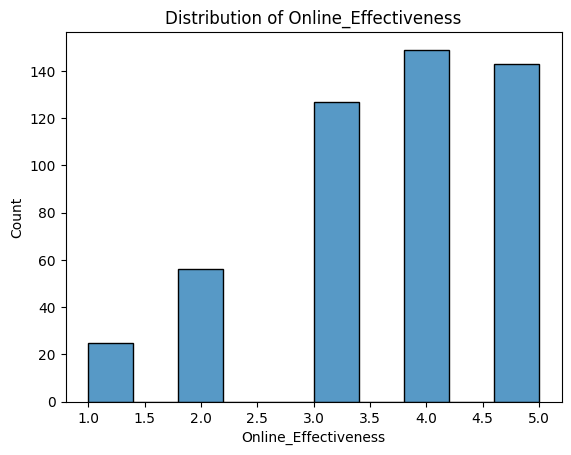

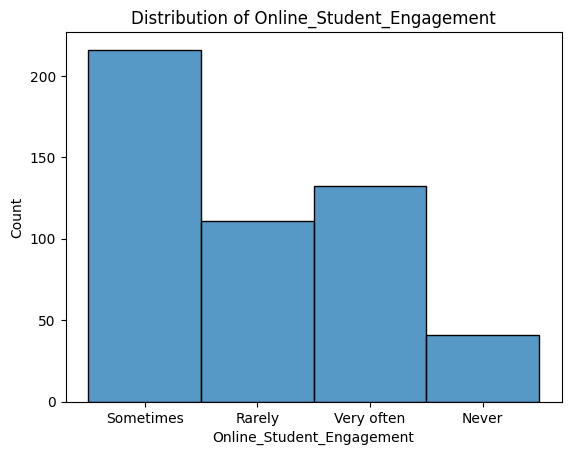

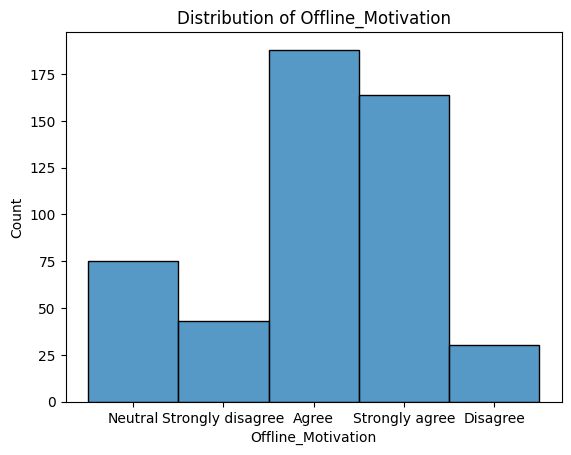

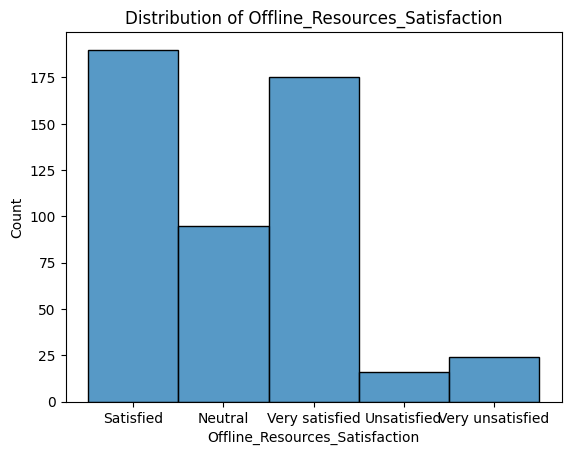

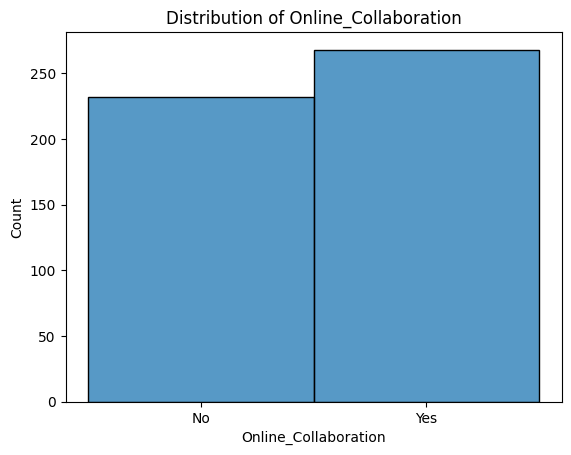

In [21]:
# Distribution Analysis
selected_columns = ['Online_Effectiveness', 'Online_Student_Engagement', 'Offline_Motivation', 'Offline_Resources_Satisfaction', 'offline_Classroom_Engagement','Online_Collaboration']
for column in selected_columns:
    if column in df.columns:
        sns.histplot(df[column], bins=10)
        plt.title(f"Distribution of {column}")
        plt.show()


# Bivariate Analysis

Better_Grades_Mode
Offline    272
Online     228
Name: Education_Mode, dtype: int64


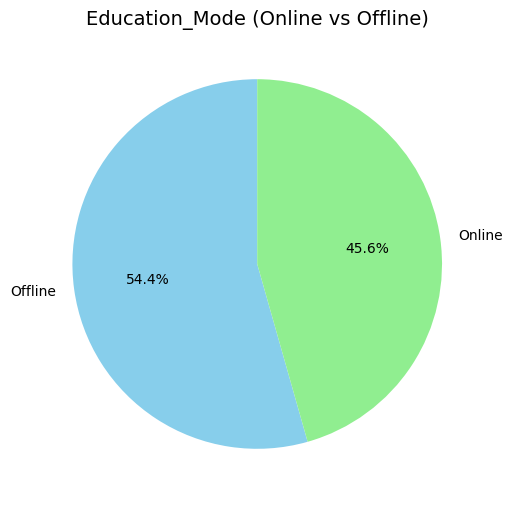

In [22]:
# Compare the effect of online and offline education on student performance

performance_comparison = df.groupby('Better_Grades_Mode')['Education_Mode'].count()
print(performance_comparison)

# Visualization of performance comparison
plt.figure(figsize=(8, 6))
plt.pie(
    performance_comparison,
    labels=performance_comparison.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen']
)
plt.title('Education_Mode (Online vs Offline)', fontsize=14)
plt.show()


Demographic Summary:
 Education_Level  Gender             Domestic_or_International        Education_Mode     
Graduate         Female             Domestic student                 Offline (In-person)    15
                                                                     Online                 10
                                    Foreign (International) student  Offline (In-person)    47
                                                                     Online                  5
                 Male               Domestic student                 Offline (In-person)    16
                                                                     Online                  8
                                    Foreign (International) student  Offline (In-person)    61
                                                                     Online                 64
                 Prefer not to say  Domestic student                 Offline (In-person)     2
                                 

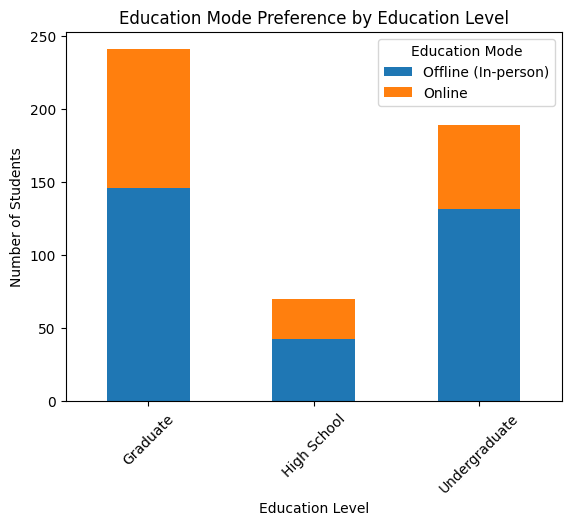

In [23]:
# Influence of demographic factors
demographic_summary = df.groupby(['Education_Level', 'Gender', 'Domestic_or_International', 'Education_Mode']).size()
print("\nDemographic Summary:\n", demographic_summary)

# Bar plot for education mode preference by education level
education_mode_by_level = df.groupby(['Education_Level', 'Education_Mode']).size().unstack()
education_mode_by_level.plot(kind='bar', stacked=True, title="Education Mode Preference by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.legend(title="Education Mode")
plt.show()

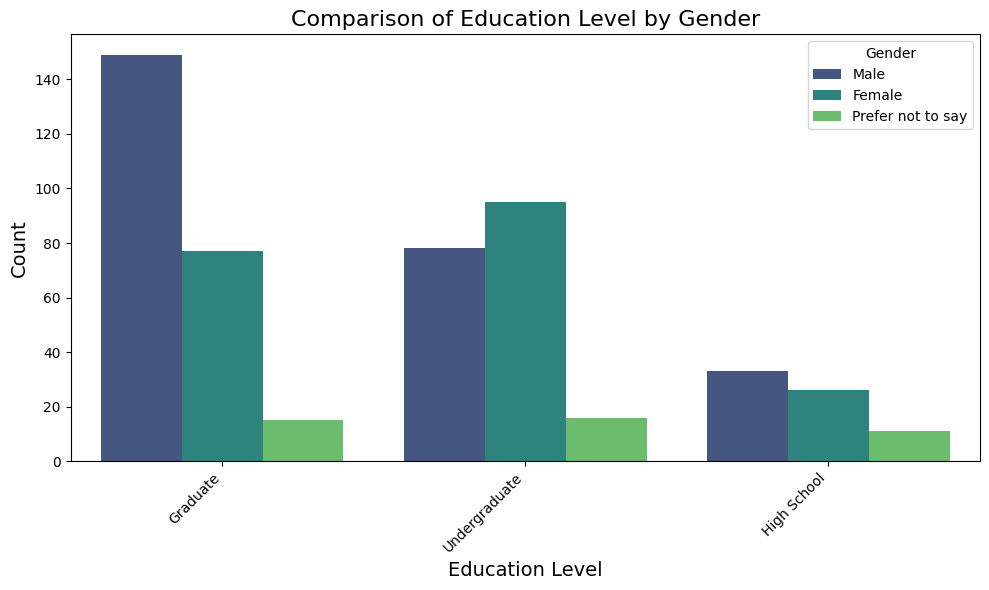

In [24]:
#Comparison between Education Level and Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education_Level', hue='Gender', palette='viridis')
plt.title("Comparison of Education Level by Gender", fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

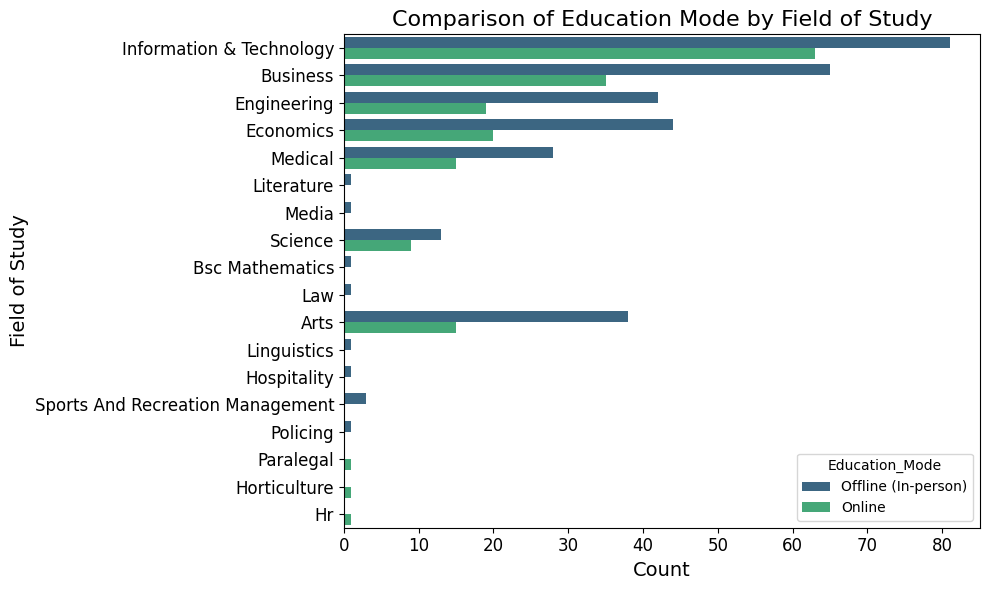

In [25]:
#Comparison between Education Mode and Field of Study (Horizontal)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Field_of_Study', hue='Education_Mode', palette='viridis')
plt.title("Comparison of Education Mode by Field of Study", fontsize=16)
plt.ylabel('Field of Study', fontsize=14)
plt.xlabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Crosstab between Domestic/International and Education Mode:
 Education_Mode                   Offline (In-person)  Online
Domestic_or_International                                   
Domestic student                                 115      62
Foreign (International) student                  206     117


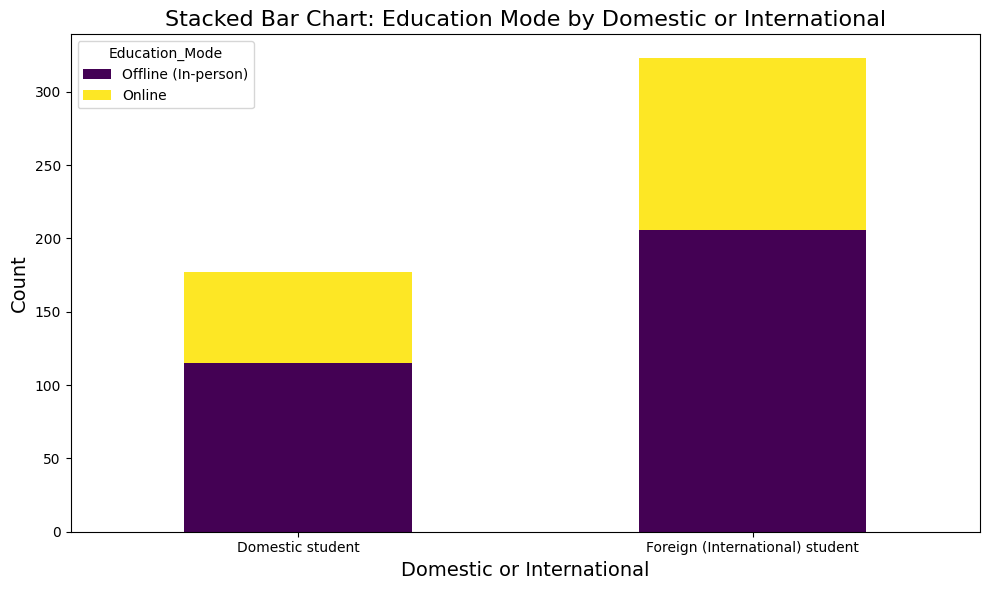

In [26]:
#Comparasion between Domestic/International and Education Mode
education_mode_vs_domestic = pd.crosstab(df['Domestic_or_International'], df['Education_Mode'])
print("\nCrosstab between Domestic/International and Education Mode:\n", education_mode_vs_domestic)

# Plot stacked bar chart for Domestic/International vs Education Mode
education_mode_vs_domestic.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Stacked Bar Chart: Education Mode by Domestic or International", fontsize=16)
plt.xlabel('Domestic or International', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-27-68c9a5d786f6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-27-68c9a5d786f6>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


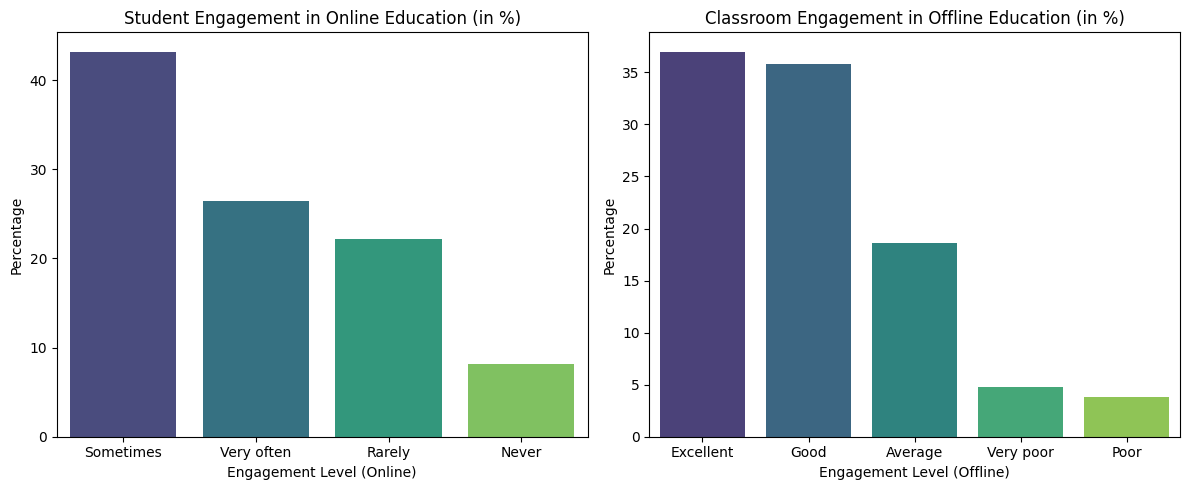

In [27]:
# Calculate percentages for student engagement
engagement_online_percentage = (df['Online_Student_Engagement'].value_counts(normalize=True) * 100)
engagement_offline_percentage = (df['Offline_Classroom_Engagement'].value_counts(normalize=True) * 100)

# Sorting to ensure consistent bar order
sorted_order = engagement_offline_percentage.sort_values(ascending=False).index

# Plotting engagement levels as percentages
plt.figure(figsize=(12, 5))

# Online engagement plot
plt.subplot(1, 2, 1)
sns.barplot(
    x=engagement_online_percentage.index,
    y=engagement_online_percentage.values,
    palette='viridis'
)
plt.title("Student Engagement in Online Education (in %)")
plt.xlabel("Engagement Level (Online)")
plt.ylabel("Percentage")

# Offline engagement plot
plt.subplot(1, 2, 2)
sns.barplot(
    x=engagement_offline_percentage.index,
    y=engagement_offline_percentage.values,
    order=sorted_order,  # Sort bars by descending order
    palette='viridis'
)
plt.title("Classroom Engagement in Offline Education (in %)")
plt.xlabel("Engagement Level (Offline)")
plt.ylabel("Percentage")

plt.tight_layout()
plt.show()

<ipython-input-28-bf49c42cc4f4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


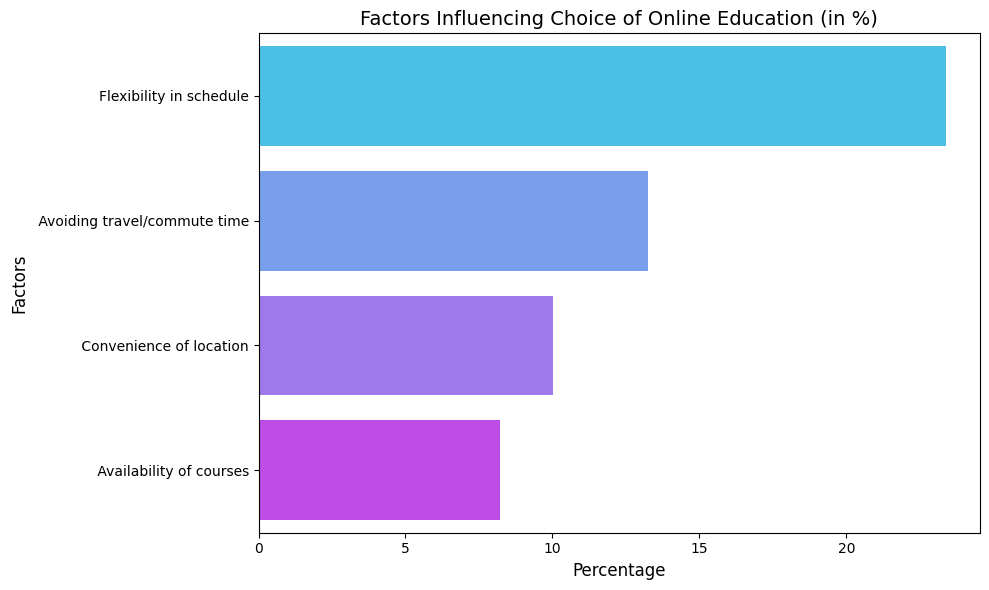

<ipython-input-28-bf49c42cc4f4>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


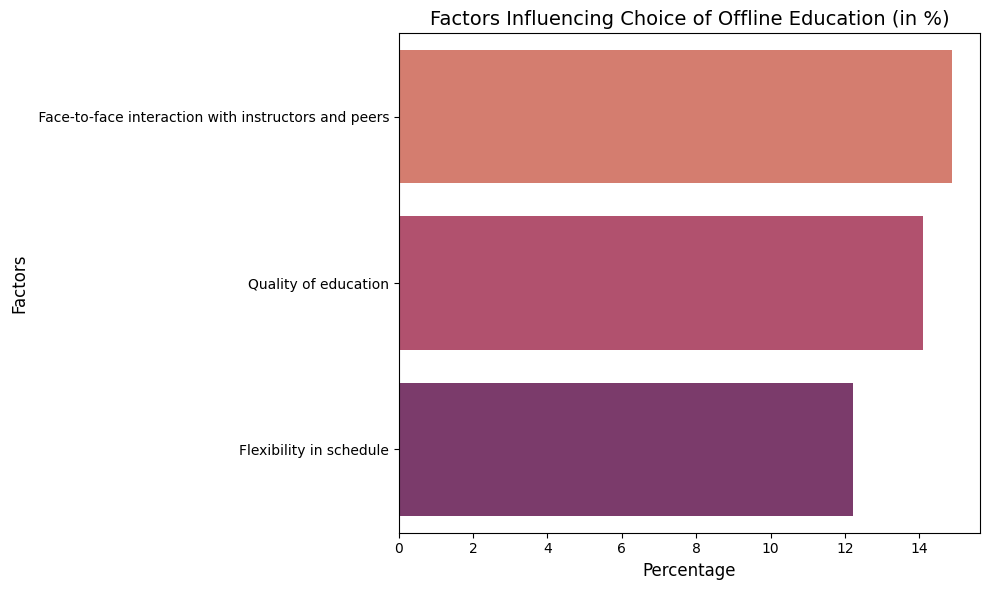

In [28]:
# Calculate percentages for online influence factors
online_factors = (
    df['Online_Influence_Factors']
    .str.split(',')
    .explode()
    .value_counts(normalize=True) * 100
)

# Calculate percentages for offline influence factors
offline_factors = (
    df['Offline_Influence_Factors']
    .str.split(',')
    .explode()
    .value_counts(normalize=True) * 100
)

# Plotting top 5 factors for online education
plt.figure(figsize=(10, 6))
sns.barplot(
    x=online_factors.values[:4],
    y=online_factors.index[:4],
    palette='cool'
)
plt.title('Factors Influencing Choice of Online Education (in %)', fontsize=14)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Factors', fontsize=12)
plt.tight_layout()
plt.show()

# Plotting top 4 factors for offline education
plt.figure(figsize=(10, 6))
sns.barplot(
    x=offline_factors.values[:3],
    y=offline_factors.index[:3],
    palette='flare'
)
plt.title('Factors Influencing Choice of Offline Education (in %)', fontsize=14)
plt.xlabel('Percentage', fontsize=12)
plt.ylabel('Factors', fontsize=12)
plt.tight_layout()
plt.show()

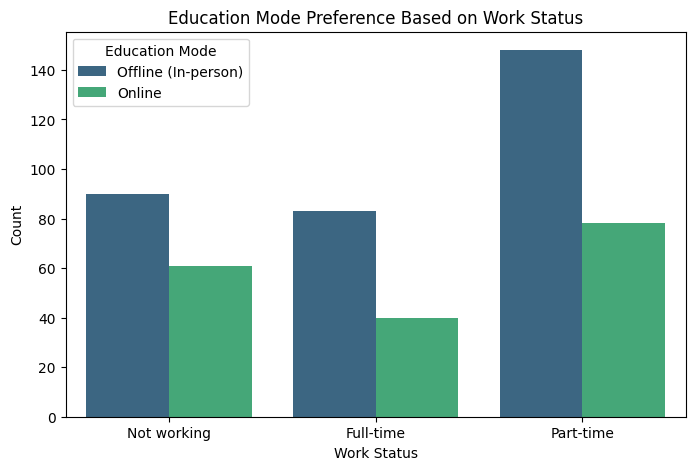

In [29]:
# Investigate factors influencing preferences for online or offline education
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Work_Status', hue='Education_Mode', palette='viridis')
plt.title("Education Mode Preference Based on Work Status")
plt.xlabel("Work Status")
plt.ylabel("Count")
plt.legend(title="Education Mode")
plt.show()

<ipython-input-30-f34d70c19b54>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=online_material_satisfaction_percentage.index,
<ipython-input-30-f34d70c19b54>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=offline_resources_satisfaction_percentage.index,


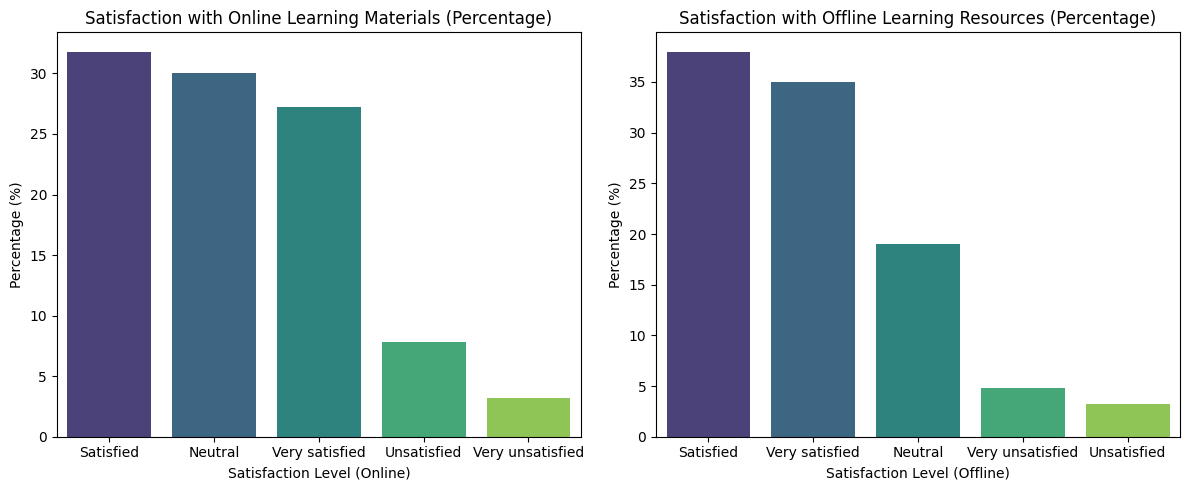

In [30]:
# Calculate percentage for Online Material Satisfaction
online_material_satisfaction_percentage = df['Online_Material_Satisfaction'].value_counts(normalize=True) * 100

# Calculate percentage for Offline Resources Satisfaction
offline_resources_satisfaction_percentage = df['Offline_Resources_Satisfaction'].value_counts(normalize=True) * 100

# Create subplots with sorted satisfaction levels
plt.figure(figsize=(12, 5))

# Plot for Online Material Satisfaction (Percentage)
plt.subplot(1, 2, 1)
sns.barplot(x=online_material_satisfaction_percentage.index,
            y=online_material_satisfaction_percentage.values,
            palette='viridis')
plt.title("Satisfaction with Online Learning Materials (Percentage)")
plt.xlabel("Satisfaction Level (Online)")
plt.ylabel("Percentage (%)")

# Plot for Offline Resources Satisfaction (Percentage)
plt.subplot(1, 2, 2)
sns.barplot(x=offline_resources_satisfaction_percentage.index,
            y=offline_resources_satisfaction_percentage.values,
            palette='viridis')
plt.title("Satisfaction with Offline Learning Resources (Percentage)")
plt.xlabel("Satisfaction Level (Offline)")
plt.ylabel("Percentage (%)")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Effectiveness of Online Education (Percentage):
 Online_Effectiveness
4    29.8
5    28.6
3    25.4
2    11.2
1     5.0
Name: proportion, dtype: float64


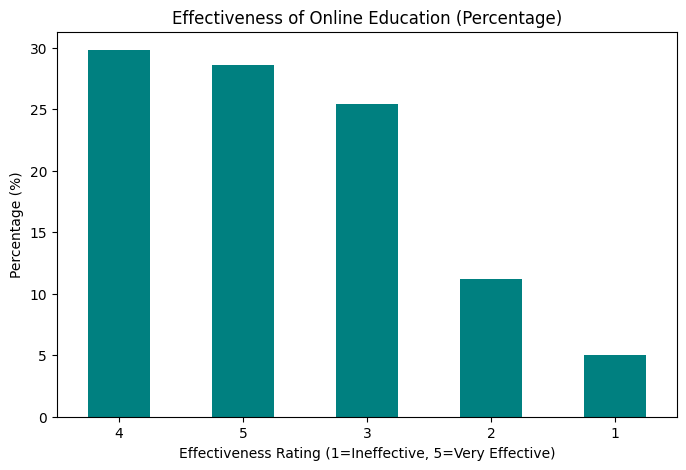

In [31]:
# Calculate percentage for Online Education Effectiveness
online_effectiveness_percentage = df['Online_Effectiveness'].value_counts(normalize=True) * 100
print("\nEffectiveness of Online Education (Percentage):\n", online_effectiveness_percentage)

# Plot Online Education Effectiveness (Percentage)
plt.figure(figsize=(8, 5))
online_effectiveness_percentage.plot(kind='bar', color='teal', title="Effectiveness of Online Education (Percentage)")
plt.xlabel("Effectiveness Rating (1=Ineffective, 5=Very Effective)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

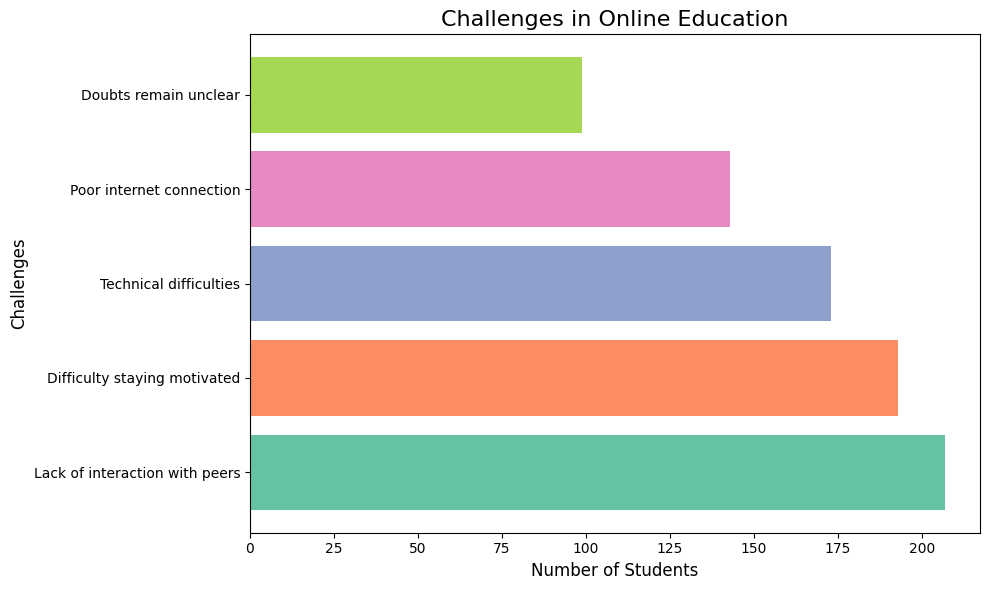

In [32]:
#Analyze the Challenges of online education

def clean_multi_select_column(column):

    # Strip extra spaces and handle entries with commas as whole phrases
    column = column.fillna("").astype(str)
    cleaned_values = column.str.split(r',\s*(?![^()]*\))').apply(lambda x: [item.strip() for item in x if item.strip()])
    return cleaned_values

# Clean the columns for Online Challenges and Offline Benefits
online_challenges_expanded = clean_multi_select_column(df['Online_Challenges']).explode().str.strip()
offline_benefits_expanded = clean_multi_select_column(df['Offline_Benefits']).explode().str.strip()

# Get value counts for both variables
online_challenges_summary = online_challenges_expanded.value_counts().head(5)
offline_benefits_summary = offline_benefits_expanded.value_counts().head(5)

# Generate unique colors for each bar
online_colors = sns.color_palette("Set2", len(online_challenges_summary))
offline_colors = sns.color_palette("Set3", len(offline_benefits_summary))

# Plot challenges in online education as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(online_challenges_summary.index, online_challenges_summary.values, color=online_colors)
plt.title("Challenges in Online Education", fontsize=16)
plt.xlabel("Number of Students", fontsize=12)
plt.ylabel("Challenges", fontsize=12)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

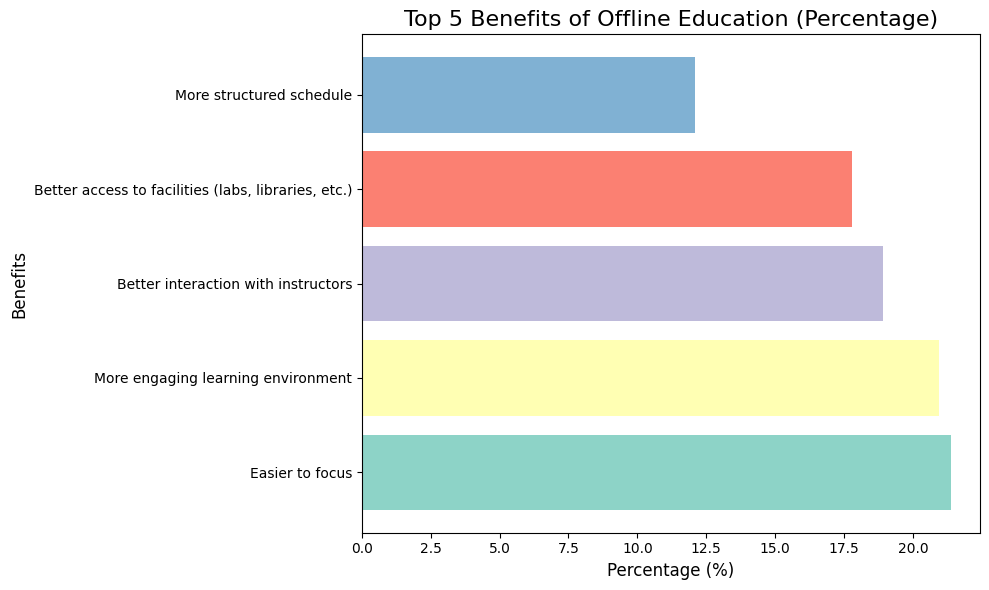

In [33]:
# Calculate percentage for Offline Education Benefits
offline_benefits_percentage = offline_benefits_expanded.value_counts(normalize=True) * 100
offline_benefits_percentage_summary = offline_benefits_percentage.head(5)

# Generate unique colors for each bar
offline_colors = sns.color_palette("Set3", len(offline_benefits_percentage_summary))

# Plot benefits of offline education as a horizontal bar chart with percentages
plt.figure(figsize=(10, 6))
plt.barh(offline_benefits_percentage_summary.index, offline_benefits_percentage_summary.values, color=offline_colors)
plt.title("Top 5 Benefits of Offline Education (Percentage)", fontsize=16)
plt.xlabel("Percentage (%)", fontsize=12)
plt.ylabel("Benefits", fontsize=12)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Correlation Matrix

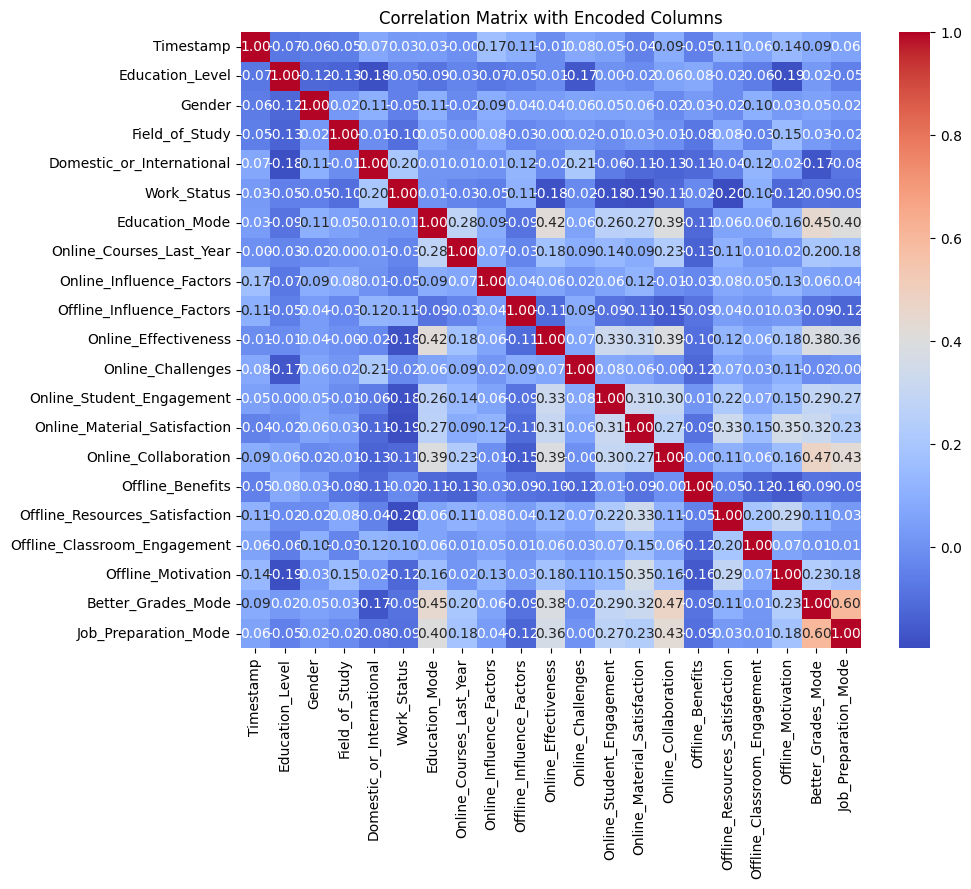

In [34]:
#correlation Matrix
# Convert categorical data to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

encoded_data = df.copy()
label_encoders = {}

categorical_cols = encoded_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])
    label_encoders[col] = le

# Recalculate the correlation matrix with encoded columns
correlation_matrix = encoded_data.corr()

# Plot the updated heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Encoded Columns")
plt.show()

# Feature Engineering

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# Identify categorical columns (excluding the target if specified later)
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for potential inverse transformation

# Feature Importance

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Import OrdinalEncoder

# Define features (X) and target (y)
X = df.drop(['Better_Grades_Mode','Timestamp'], axis=1)  # Assuming 'Better_Grades_Mode' is your target variable
y = df['Better_Grades_Mode']

# Convert all features to numeric if needed and handle categorical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Create an OrdinalEncoder for categorical features
ordinal_encoder = OrdinalEncoder()
X[categorical_features] = ordinal_encoder.fit_transform(X[categorical_features])

# Fill NaN with 0 for all columns after encoding
X = X.fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier (or any suitable model)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize feature importances
feature_importance_df




,Feature,Importance
18,Job_Preparation_Mode,0.184420
13,Online_Collaboration,0.075468
14,Offline_Benefits,0.067312
8,Offline_Influence_Factors,0.067052
5,Education_Mode,0.066868
10,Online_Challenges,0.062856
7,Online_Influence_Factors,0.060599
12,Online_Material_Satisfaction,0.056447
9,Online_Effectiveness,0.053262
11,Online_Student_Engagement,0.046555


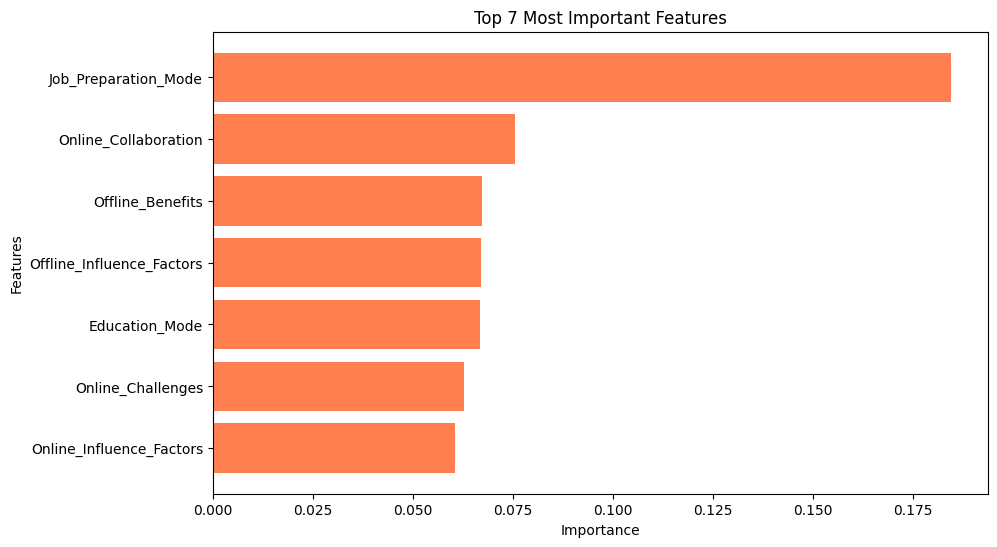

In [37]:

# Plot the top 7 most important features
top_7_features = feature_importance_df.head(7)
plt.figure(figsize=(10, 6))
plt.barh(top_7_features['Feature'], top_7_features['Importance'], color='coral')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Top 7 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

## Chi-Square Test

In [38]:
from scipy.stats import chi2_contingency
def perform_chi2_test(df, column1, column2):
    """Performs a chi-squared test and prints the results."""
    contingency_table = pd.crosstab(df[column1], df[column2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    alpha = 0.05

    print(f"Chi-square test for {column1} vs. {column2}:")
    print("Chi-square statistic:", chi2)
    print("P-value:", p)

    if p < alpha:
        print("Reject the null hypothesis. There is a significant association between the two variables.")
    else:
        print("Fail to reject the null hypothesis. There is no significant association between the two variables.")
    print("-" * 20)

# Test relationships with 'Education_Mode'
perform_chi2_test(df, 'Better_Grades_Mode', 'Education_Level')
perform_chi2_test(df, 'Better_Grades_Mode', 'Field_of_Study')
perform_chi2_test(df, 'Better_Grades_Mode', 'Work_Status')
perform_chi2_test(df, 'Better_Grades_Mode', 'Online_Courses_Last_Year')
perform_chi2_test(df, 'Better_Grades_Mode', 'Better_Grades_Mode')
perform_chi2_test(df, 'Better_Grades_Mode', 'Job_Preparation_Mode')
perform_chi2_test(df, 'Better_Grades_Mode', 'Online_Collaboration')
perform_chi2_test(df, 'Better_Grades_Mode', 'Better_Grades_Mode')
perform_chi2_test(df, 'Better_Grades_Mode', 'Online_Material_Satisfaction')
perform_chi2_test(df, 'Better_Grades_Mode', 'Education_Mode')
perform_chi2_test(df, 'Better_Grades_Mode', 'Offline_Benefits')
perform_chi2_test(df, 'Better_Grades_Mode', 'Online_Challenges')
perform_chi2_test(df, 'Better_Grades_Mode', 'Offline_Influence_Factors')
perform_chi2_test(df, 'Better_Grades_Mode', 'Online_Influence_Factors')
perform_chi2_test(df, 'Better_Grades_Mode', 'Online_Effectiveness')
perform_chi2_test(df, 'Better_Grades_Mode', 'Online_Student_Engagement')
perform_chi2_test(df, 'Better_Grades_Mode', 'Offline_Classroom_Engagement')
perform_chi2_test(df, 'Better_Grades_Mode', 'Offline_Resources_Satisfaction')
perform_chi2_test(df, 'Better_Grades_Mode', 'Domestic_or_International')

Chi-square test for Better_Grades_Mode vs. Education_Level:
Chi-square statistic: 2.711052835716151
P-value: 0.2578115421239437
Fail to reject the null hypothesis. There is no significant association between the two variables.
--------------------
Chi-square test for Better_Grades_Mode vs. Field_of_Study:
Chi-square statistic: 20.71287843405701
P-value: 0.2393972955657555
Fail to reject the null hypothesis. There is no significant association between the two variables.
--------------------
Chi-square test for Better_Grades_Mode vs. Work_Status:
Chi-square statistic: 7.567709947311719
P-value: 0.02273487991516807
Reject the null hypothesis. There is a significant association between the two variables.
--------------------
Chi-square test for Better_Grades_Mode vs. Online_Courses_Last_Year:
Chi-square statistic: 19.121611244946966
P-value: 1.2264821649451026e-05
Reject the null hypothesis. There is a significant association between the two variables.
--------------------
Chi-square test 

In [39]:
pip install pycaret

# Pycaret

In [ ]:


from pycaret.classification import *


# Initialize PyCaret setup for classification
clf = setup(data=df, target='Better_Grades_Mode', session_id=123,
            normalize=True,
            transformation=True,
            ignore_features=['Timestamp'])  # Removed silent=True

# Compare different classification models
compare_models()

# Choose the best model (e.g., based on AUC, Accuracy)
best_model = create_model('rf')  # Replace 'rf' with the abbreviation of your preferred model

# Tune the model
tuned_best_model = tune_model(best_model)

# Evaluate the tuned model on the hold-out set
evaluate_model(tuned_best_model)

# Make predictions on a new dataset (if needed)
# predictions = predict_model(tuned_best_model, data=new_data)

# Finalize the model for deployment
final_best_model = finalize_model(tuned_best_model)

# Save the model
save_model(final_best_model, 'my_best_model')



,Description,Value
0,Session id,123
1,Target,Better_Grades_Mode
2,Target type,Binary
3,Original data shape,"(500, 21)"
4,Transformed data shape,"(500, 20)"
5,Transformed train set shape,"(350, 20)"
6,Transformed test set shape,"(150, 20)"
7,Ignore features,1
8,Numeric features,19
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8229,0.8949,0.8312,0.7959,0.8117,0.6448,0.6475,0.4480
rf,Random Forest Classifier,0.8171,0.8939,0.8312,0.7852,0.8057,0.6334,0.6372,0.5800
lr,Logistic Regression,0.8057,0.8747,0.7750,0.8009,0.7857,0.6081,0.6109,1.6640
ridge,Ridge Classifier,0.8029,0.8812,0.7688,0.8001,0.7823,0.6023,0.6050,0.1240
lda,Linear Discriminant Analysis,0.8029,0.8803,0.7688,0.8001,0.7823,0.6023,0.6050,0.1350
knn,K Neighbors Classifier,0.8000,0.8732,0.7688,0.7894,0.7764,0.5958,0.5992,0.1320
gbc,Gradient Boosting Classifier,0.8000,0.8829,0.7875,0.7816,0.7821,0.5974,0.6008,0.5560
xgboost,Extreme Gradient Boosting,0.8000,0.8865,0.8000,0.7764,0.7860,0.5985,0.6017,0.1240
qda,Quadratic Discriminant Analysis,0.7914,0.8595,0.7750,0.7808,0.7744,0.5807,0.5853,0.1110
nb,Naive Bayes,0.7857,0.8763,0.7750,0.7667,0.7672,0.5690,0.5737,0.1300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8355,0.8125,0.7647,0.7879,0.5990,0.6000
1,0.8000,0.8553,0.8125,0.7647,0.7879,0.5990,0.6000
2,0.8571,0.9605,0.9375,0.7895,0.8571,0.7164,0.7270
3,0.8000,0.8717,0.7500,0.8000,0.7742,0.5950,0.5960
4,0.7714,0.9243,0.7500,0.7500,0.7500,0.5395,0.5395
5,0.8286,0.8849,0.8750,0.7778,0.8235,0.6580,0.6623
6,0.8000,0.9046,0.8125,0.7647,0.7879,0.5990,0.6000
7,0.8857,0.9391,0.8125,0.9286,0.8667,0.7674,0.7727
8,0.8571,0.9194,0.9375,0.7895,0.8571,0.7164,0.7270


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8000,0.8257,0.8125,0.7647,0.7879,0.5990,0.6000
1,0.8000,0.8586,0.8125,0.7647,0.7879,0.5990,0.6000
2,0.8286,0.9013,0.8750,0.7778,0.8235,0.6580,0.6623
3,0.8286,0.8684,0.7500,0.8571,0.8000,0.6512,0.6556
4,0.8286,0.9309,0.8125,0.8125,0.8125,0.6546,0.6546
5,0.8000,0.8947,0.8750,0.7368,0.8000,0.6029,0.6118
6,0.8286,0.8980,0.8750,0.7778,0.8235,0.6580,0.6623
7,0.9429,0.9375,0.8750,1.0000,0.9333,0.8837,0.8898
8,0.8571,0.9211,0.9375,0.7895,0.8571,0.7164,0.7270


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Education_Level', 'Gender',
                                              'Field_of_Study',
                                              'Domestic_or_International',
                                              'Work_Status', 'Education_Mode',
                                              'Online_Courses_Last_Year',
                                              'Online_Influence_Factors',
                                              'Offline_Influence_Factors',
                                              'Online_Effectiveness',
                                              'Online_Challenges',
                                              'Online_Student...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
    

# Decision Tree

Decision Tree Accuracy: 0.85
Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.15
Root Mean Squared Error (RMSE): 0.3872983346207417
R² Score: 0.39783219590525876


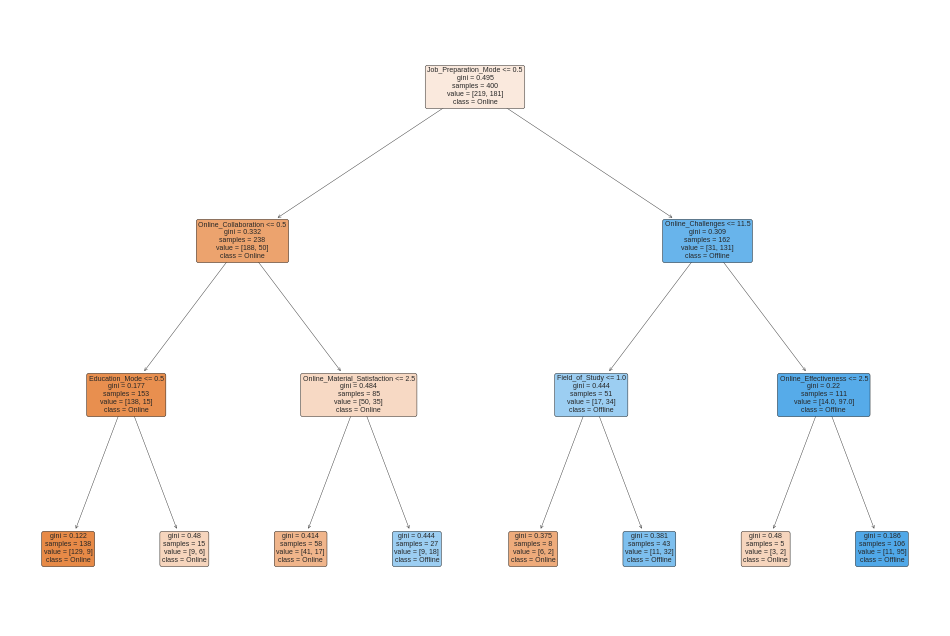

In [41]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Feature Selection and Encoding for Decision Tree

features = [ 'Online_Influence_Factors', 'Offline_Influence_Factors','Online_Collaboration','Online_Material_Satisfaction',
            'Online_Effectiveness', 'Offline_Benefits','Education_Mode','Online_Student_Engagement','Online_Challenges',
             'Job_Preparation_Mode', 'Field_of_Study']


target = 'Better_Grades_Mode'

# Create a copy of your DataFrame to avoid modifying the original
df_encoded = df.copy()

label_encoders = {}
for column in features + [target]:
    if df_encoded[column].dtype == 'object':  # Check if the column is categorical
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
clf = DecisionTreeClassifier(max_depth=3)  # Adjust max_depth as needed
clf = clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")

# Compute additional regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=features, class_names=['Online', 'Offline'], filled=True, rounded=True)
plt.show()


In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0,1])

array([[42, 11],
       [ 4, 43]])

In [43]:
# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [44]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf.predict_proba(X_test)

array([[0.10377358, 0.89622642],
       [0.6       , 0.4       ],
       [0.25581395, 0.74418605],
       [0.10377358, 0.89622642],
       [0.93478261, 0.06521739],
       [0.10377358, 0.89622642],
       [0.33333333, 0.66666667],
       [0.70689655, 0.29310345],
       [0.33333333, 0.66666667],
       [0.70689655, 0.29310345],
       [0.10377358, 0.89622642],
       [0.70689655, 0.29310345],
       [0.10377358, 0.89622642],
       [0.10377358, 0.89622642],
       [0.10377358, 0.89622642],
       [0.93478261, 0.06521739],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.6       , 0.4       ],
       [0.10377358, 0.89622642],
       [0.93478261, 0.06521739],
       [0.33333333, 0.66666667],
       [0.93478261, 0.06521739],
       [0.33333333, 0.66666667],
       [0.93478261, 0.06521739],
       [0.10377358, 0.89622642],
       [0.25581395, 0.74418605],
       [0.6       , 0.4       ],
       [0.10377358, 0.89622642],
       [0.93478261, 0.06521739],
       [0.

In [45]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.7962962962962963

In [46]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9148936170212766

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['offline','online']))

              precision    recall  f1-score   support

     offline       0.91      0.79      0.85        53
      online       0.80      0.91      0.85        47

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.86      0.85      0.85       100



In [48]:
feature_names = X.columns
feature_names

Index(['Online_Influence_Factors', 'Offline_Influence_Factors',
       'Online_Collaboration', 'Online_Material_Satisfaction',
       'Online_Effectiveness', 'Offline_Benefits', 'Education_Mode',
       'Online_Student_Engagement', 'Online_Challenges',
       'Job_Preparation_Mode', 'Field_of_Study'],
      dtype='object')

In [49]:
clf.feature_importances_

array([0.        , 0.        , 0.11129663, 0.05320471, 0.02433109,
       0.        , 0.03138005, 0.        , 0.03104823, 0.71464997,
       0.03408931])

## K-means Clustering

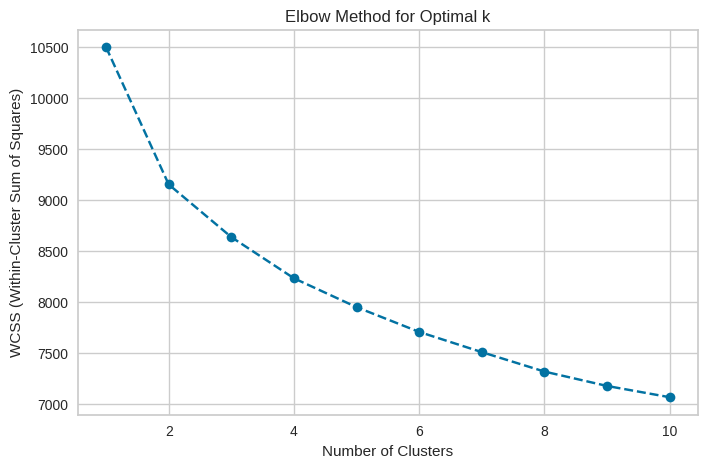

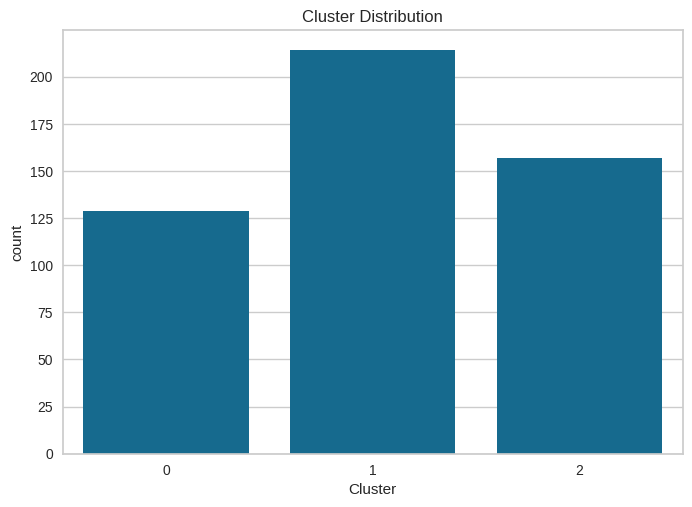

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Convert categorical variables to numeric using Label Encoding
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Fit K-Means with optimal k (choose k from elbow method)
optimal_k = 3  # Change this based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize cluster distribution
sns.countplot(x=df['Cluster'])
plt.title('Cluster Distribution')
plt.show()

In [51]:
from sklearn.decomposition import PCA # Import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


# Get feature names if your data is a DataFrame
features = df_scaled.columns if hasattr(df_scaled, 'columns') else [f"Feature {i}" for i in range(df_scaled.shape[1])]

# Create a DataFrame for the PCA components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=features)
print(loadings)

                 PC1       PC2
Feature 0   0.058530 -0.218613
Feature 1  -0.035858  0.382449
Feature 2   0.044705 -0.166581
Feature 3   0.040671 -0.130274
Feature 4  -0.072497 -0.409579
Feature 5  -0.141014 -0.122671
Feature 6   0.341706 -0.015292
Feature 7   0.190207 -0.028392
Feature 8   0.086886 -0.204115
Feature 9  -0.094712 -0.287724
Feature 10  0.343107  0.045235
Feature 11  0.052643 -0.345935
Feature 12  0.292528  0.029226
Feature 13  0.314105 -0.060861
Feature 14  0.349445  0.172789
Feature 15 -0.091492  0.278671
Feature 16  0.180414 -0.200810
Feature 17  0.075196 -0.257557
Feature 18  0.230267 -0.284048
Feature 19  0.384036  0.130040
Feature 20  0.350874  0.122009


In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assuming KMeans is already fitted
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters based on your model
df['Cluster'] = kmeans.fit_predict(df_scaled)  # Assign cluster labels

# Get the centroids
centroids = kmeans.cluster_centers_

# Get original column names from 'df' (before scaling)
original_columns = df.drop(columns=['Cluster']).columns  # Exclude the 'Cluster' column

# Convert to DataFrame for readability, using original column names
centroid_df = pd.DataFrame(centroids, columns=original_columns)
print("Cluster Centroids:\n", centroid_df)

# Identify data points belonging to each centroid
clusters = {i: df[df['Cluster'] == i] for i in range(kmeans.n_clusters)}

# Display data points per cluster
for cluster_id, cluster_data in clusters.items():
    print(f"\nCluster {cluster_id}:")
    print(cluster_data.drop(columns=['Cluster']).head())  # Drop 'Cluster' for cleaner view

Cluster Centroids:
    Timestamp  Education_Level    Gender  Field_of_Study  \
0   0.154418        -0.139508 -0.009424        0.096889   
1  -0.113059        -0.078940  0.008120        0.032390   
2   0.028127         0.224158 -0.003399       -0.124760   

   Domestic_or_International  Work_Status  Education_Mode  \
0                  -0.232359    -0.455483        0.724692   
1                   0.244225     0.141947       -0.659432   
2                  -0.144449     0.181017        0.309567   

   Online_Courses_Last_Year  Online_Influence_Factors  \
0                  0.447407                  0.274456   
1                 -0.276938                 -0.051410   
2                  0.011706                 -0.156101   

   Offline_Influence_Factors  ...  Online_Challenges  \
0                  -0.253717  ...           0.159595   
1                   0.225985  ...           0.140809   
2                  -0.101648  ...          -0.326036   

   Online_Student_Engagement  Online_Materia

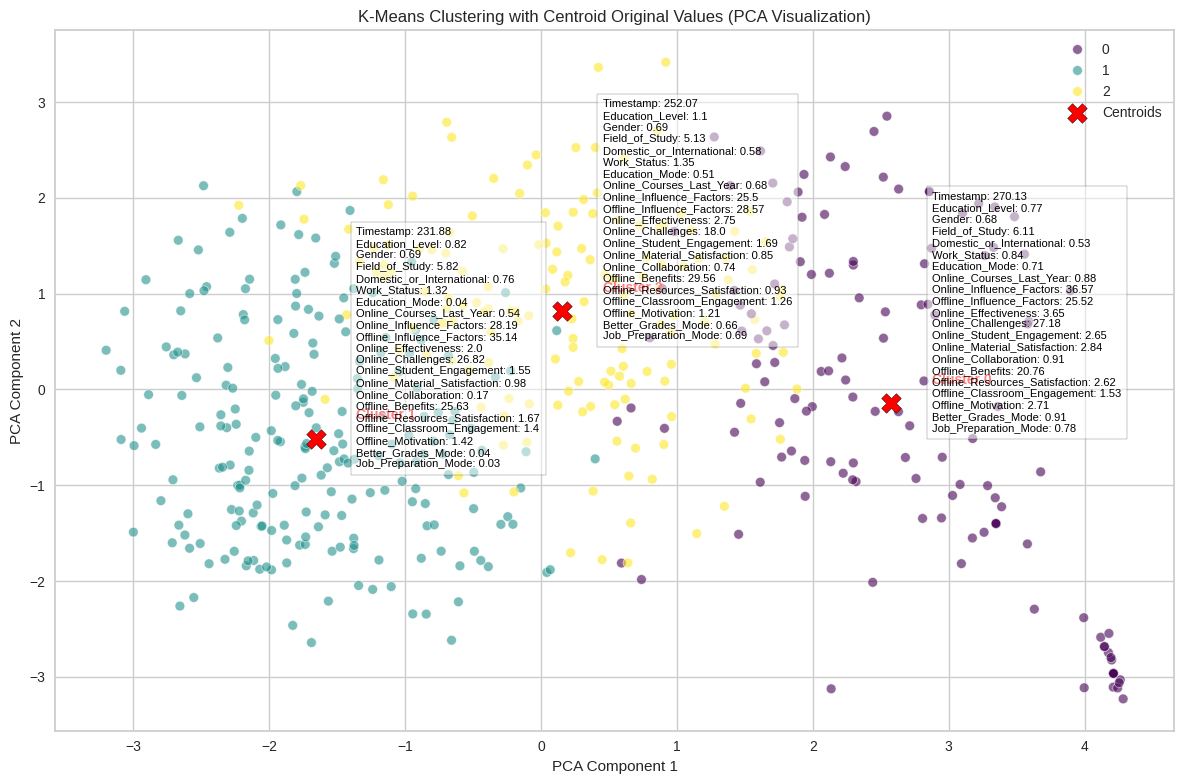

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# PCA fit and transform
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Transform cluster centers to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Original values of centroids (from scaled space back to feature space)
# If df_scaled was done using StandardScaler, inverse_transform gets original values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Cluster'], errors='ignore'))
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)
centroid_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.6)

# Plot centroids
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids', edgecolor='black')

# Annotate centroids with cluster ID and original feature values
for i, (x, y) in enumerate(centroids_pca):
    plt.text(x + 0.3, y + 0.2, f'Cluster {i}', fontsize=10, weight='bold', color='red')
    # Print original values as a short string
    orig_vals = np.round(centroid_original[i], 2)
    val_text = "\n".join([f"{col}: {val}" for col, val in zip(df.columns[:-1], orig_vals)])
    plt.text(x + 0.3, y - 0.3, val_text, fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with Centroid Original Values (PCA Visualization)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

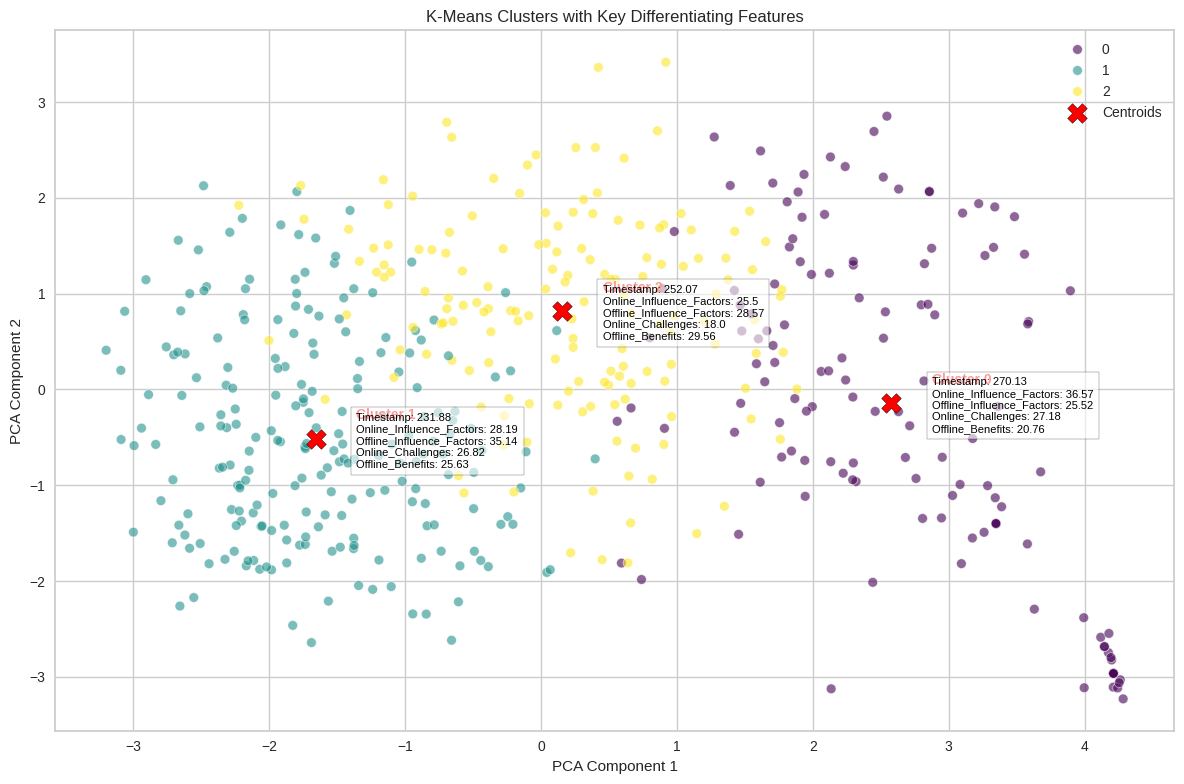

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Scale and cluster
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['Cluster'], errors='ignore'))
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# PCA transform
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Get original (unscaled) centroid values
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids_original, columns=df.columns[:-1])

# Identify significant features: features that vary across clusters
feature_variation = centroid_df.std()
threshold = feature_variation.mean()  # or use a percentile like np.percentile(feature_variation, 75)
important_features = feature_variation[feature_variation > threshold].index.tolist()

# Transform centroids into PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis', alpha=0.6)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids', edgecolor='black')

# Annotate centroids with only important feature values
for i, (x, y) in enumerate(centroids_pca):
    plt.text(x + 0.3, y + 0.2, f'Cluster {i}', fontsize=10, weight='bold', color='red')

    # Filter features that matter
    important_vals = centroid_df.loc[i, important_features]
    val_text = "\n".join([f"{col}: {round(val, 2)}" for col, val in important_vals.items()])

    plt.text(x + 0.3, y - 0.3, val_text, fontsize=8, color='black', bbox=dict(facecolor='white', alpha=0.6))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters with Key Differentiating Features')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Random Forest Classifier

In [55]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error

# Assuming 'df' is your DataFrame and you have features and target defined
# Feature Selection (Try reducing features based on importance)
features = [ 'Online_Influence_Factors', 'Offline_Influence_Factors','Online_Collaboration','Online_Material_Satisfaction',
            'Online_Effectiveness', 'Offline_Benefits','Education_Mode','Online_Student_Engagement','Online_Challenges',
             'Job_Preparation_Mode', 'Field_of_Study']

target = 'Better_Grades_Mode'

df_encoded = df.copy()

# Encode categorical variables
label_encoders = {}
for column in features + [target]:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

X = df_encoded[features]
y = df_encoded[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # This line was missing or not executed


# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)  # Initialize the classifier
rf_clf.fit(X_train, y_train) # Train the classifier
y_pred_prob = rf_clf.predict_proba(X_test)
y_pred_prob_class1 = y_pred_prob[:, 1]
rmse = np.sqrt(mean_squared_error(y_test, y_pred_prob_class1))
print(f"Random Forest RMSE: {rmse}")
# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model's accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest RMSE: 0.3467765851380396
Random Forest Accuracy: 0.82


In [56]:
mse = mean_squared_error(y_test, y_pred_prob_class1)
mae = mean_absolute_error(y_test, y_pred_prob_class1)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.2656
Mean Squared Error (MSE): 0.12025400000000001


In [57]:
y_pred = rf_clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [58]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


[[40 13]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.82        53
           1       0.76      0.89      0.82        47

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100

Accuracy: 0.82


##XGBoost

In [59]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [60]:
features = [ 'Online_Influence_Factors', 'Offline_Influence_Factors','Online_Collaboration','Online_Material_Satisfaction',
            'Online_Effectiveness', 'Offline_Benefits','Education_Mode','Online_Student_Engagement','Online_Challenges',
             'Job_Preparation_Mode', 'Field_of_Study']
target = 'Better_Grades_Mode'

df_encoded = df.copy()

# Encode categorical variables
label_encoders = {}
for column in features + [target]:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Prevent warning
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='binary:logistic', ...)

In [61]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [62]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[43 10]
 [ 8 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        53
           1       0.80      0.83      0.81        47

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100


Accuracy Score: 0.82


In [63]:
# Regression-style metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nMean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.18
Mean Absolute Error (MAE): 0.18
Root Mean Squared Error (RMSE): 0.4242640687119285
